In [1]:
# Autoreload extension for Jupyter notebooks
%load_ext autoreload
%autoreload 2

# Manual reload
from importlib import reload

# Magic commands for inline plotting and high-res figures
%matplotlib inline
%config InlineBackend.figure_format ='retina'

# Standard library imports
import os
import sys
import pickle

# Third-party library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Pandas and plotting configurations
pd.set_option('display.max_rows', 1000)
idx = pd.IndexSlice

# Figure formatting
import rsmf
FIG_FORMATTER: rsmf.abstract_formatter.AbstractFormatter = rsmf.setup(
    r"\documentclass[a4paper,twocolumn,10pt,unpublished]{quantumarticle}"
)
COLORS = plt.get_cmap('tab10')
plt.rcParams.update({
    "axes.prop_cycle": plt.cycler("color", plt.cm.tab10.colors),
    "xtick.direction": "out",
    "ytick.direction": "out",
    "xtick.major.size": 3,
    "ytick.major.size": 3,
    "figure.constrained_layout.use": True,
    "figure.constrained_layout.h_pad": 0.04,
    "figure.constrained_layout.w_pad": 0.04,
    "figure.constrained_layout.hspace": 0.01,
    "figure.constrained_layout.wspace": 0.01,
    "legend.framealpha": 0.5,
})

# For in-line display of rsmf figures
import matplotlib
from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)
matplotlib.use('module://matplotlib_inline.backend_inline')

# Utility functions
def write_pickle(path, obj):
    with open(path, 'wb') as f:
        pickle.dump(obj, f)

def read_pickle(path):
    with open(path, 'rb') as f:
        obj = pickle.load(f)
    return obj

from simulations.analysis.plotting_helpers import (
    error_band_plot, load_data
)

## Post-selection after finishing

In [2]:
df_ps_dict = load_data("bb_sliding_window")

In [3]:
list(df_ps_dict.keys())

['max_window_cluster_size_norm_frac_2',
 'committed_cluster_llr_norm_frac_2',
 'avg_window_cluster_size_norm_frac_2',
 'avg_window_cluster_llr_norm_frac_2',
 'max_window_cluster_llr_norm_frac_2']

In [ ]:
df_ps = df_ps_dict["committed_cluster_llr_norm_frac_2"]
df_ps.loc[(144, 12, 3e-3, 3, 1)]

,p_fail,delta_p_fail,p_abort,delta_p_abort,count,num_fails,p_fail_conv,delta_p_fail_conv,p_abort_conv,delta_p_abort_conv,count_conv,num_fails_conv
committed_cluster_llr_norm_frac,,,,,,,,,,,,
0.0003,1.001207e-02,1.001207e-02,9.999981e-01,2.694220e-07,188,0,NaN,NaN,NaN,NaN,NaN,NaN
0.0004,3.092372e-05,3.092372e-05,9.993789e-01,4.883040e-06,62108,0,NaN,NaN,NaN,NaN,NaN,NaN
0.0005,8.890554e-07,8.890554e-07,9.783959e-01,2.849534e-05,2160412,0,NaN,NaN,NaN,NaN,NaN,NaN
0.0006,2.539641e-07,2.386149e-07,8.849944e-01,6.252847e-05,11500557,1,NaN,NaN,NaN,NaN,NaN,NaN
0.0007,4.077793e-07,2.527780e-07,7.812364e-01,8.102646e-05,21876361,7,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
0.1453,2.783089e-02,3.223907e-05,6.920729e-08,4.785028e-08,99999995,2783087,NaN,NaN,NaN,NaN,NaN,NaN
0.1454,2.783090e-02,3.223907e-05,5.920729e-08,4.365207e-08,99999996,2783088,NaN,NaN,NaN,NaN,NaN,NaN
0.1483,2.783092e-02,3.223908e-05,3.920729e-08,3.372257e-08,99999998,2783090,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df_ps_ordinary = load_data("bb_old")["cluster_llr_norm_frac_2"]

df_ps_ordinary.head()

p_fail  delta_p_fail   p_abort  \
n  T p     cluster_llr_norm_frac                                         
72 6 0.001 0.0000                 2.930787e-08  2.930787e-08  0.934464   
           0.0004                 9.663292e-09  9.663292e-09  0.801234   
           0.0005                 3.375110e-08  1.837155e-08  0.646805   
           0.0006                 7.707345e-08  2.306248e-08  0.456094   
           0.0007                 1.852848e-07  3.174223e-08  0.298805   

                                  delta_p_abort      count  num_fails  \
n  T p     cluster_llr_norm_frac                                        
72 6 0.001 0.0000                      0.000015   65536304          0   
           0.0004                      0.000025  198765539          0   
           0.0005                      0.000030  353195237         10   
           0.0006                      0.000031  543906200         40   
           0.0007                      0.000028  701194932        128   

                                  p_fail_conv  delta_p_fail_conv  \
n  T p     cluster_llr_norm_frac                                   
72 6 0.001 0.0000                    0.000027       3.499930e-07   
           0.0004                    0.000027       3.499930e-07   
           0.0005                    0.000027       3.481023e-07   
           0.0006                    0.000026       3.432369e-07   
           0.0007                    0.000026       3.348863e-07   

                                  p_abort_conv  delta_p_abort_conv  \
n  T p     cluster_llr_norm_frac                                     
72 6 0.001 0.0000                     0.158519            0.000023   
           0.0004                     0.158519            0.000023   
           0.0005                     0.153948            0.000022   
           0.0006                     0.142164            0.000022   
           0.0007                     0.120481            0.000020   

                                   count_conv  num_fails_conv  
n  T p     cluster_llr_norm_frac                               
72 6 0.001 0.0000                 841481381.0           22579  
           0.0004                 841481381.0           22579  
           0.0005                 846051969.0           22579  
           0.0006                 857835805.0           22568  
           0.0007                 879518981.0           22583

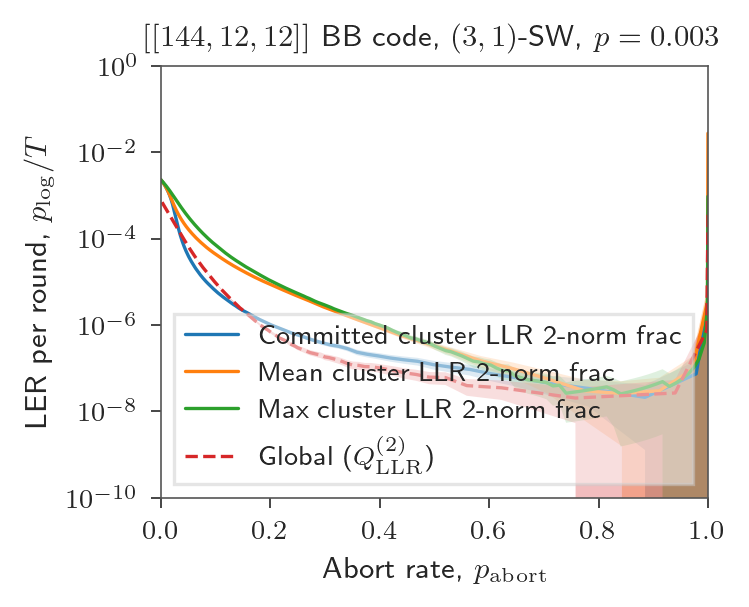

In [40]:
fig = FIG_FORMATTER.figure(aspect_ratio=0.8, width_ratio=0.5)
ax = fig.add_subplot()
n, T, p, W, F = prms = (144, 12, 3e-3, 3, 1)
labels = {
    "avg_window_cluster_llr_norm_frac_2": r"Mean cluster LLR 2-norm frac",
    "max_window_cluster_llr_norm_frac_2": r"Max cluster LLR 2-norm frac",
    "committed_cluster_llr_norm_frac_2": r"Committed cluster LLR 2-norm frac",
}
for by in df_ps_dict.keys():
    if by not in labels:
        continue
    df_ps = df_ps_dict[by].loc[prms]
    error_band_plot(
        df_ps["p_abort"],
        df_ps["p_fail"] / T,
        df_ps["delta_p_fail"] / T,
        ax=ax,
        label=labels[by],
    )

df_ps_ordinary_sng = df_ps_ordinary.loc[(n, T, p)]
error_band_plot(
    df_ps_ordinary_sng["p_abort"],
    df_ps_ordinary_sng["p_fail"] / T,
    df_ps_ordinary_sng["delta_p_fail"] / T,
    ax=ax,
    linestyle="--",
    label=r"Global ($Q_\mathrm{LLR}^{(2)}$)",
)

ax.set_yscale("log")
ax.set_xlim(0, 1)
ax.set_ylim(1e-10, 1)

ax.set_xlabel("Abort rate, $p_\mathrm{abort}$")
ax.set_ylabel("LER per round, $p_\mathrm{log}/T$")
ax.set_title(rf"$[[144, 12, 12]]$ BB code, $(3,1)$-SW, $p={p:.3f}$", fontsize=9)

ax.legend(fontsize=8)

# fig.savefig("overleaf_figs/sliding_window_bb_code_ler_vs_abort_rate.pdf")

(0.0001, 0.1)

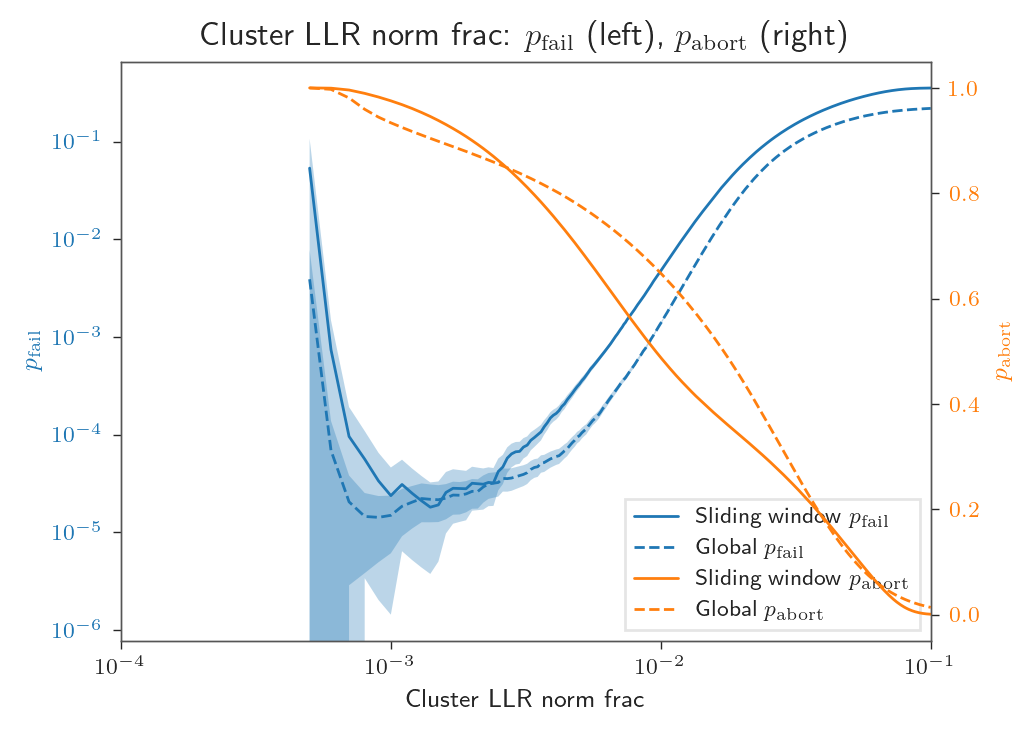

In [54]:
import matplotlib.pyplot as plt
import pandas as pd


def plot_cluster_llr_norm_frac_dual_axis(
    df_ps: pd.DataFrame,
    df_ps_ordinary: pd.DataFrame,
    prms: tuple,
    label_main: str = r"Sliding window",
    label_ordinary: str = r"Single shot",
    color_pfail: str = "tab:blue",
    color_pabort: str = "tab:orange",
    xlim: tuple = (0, 0.1),
) -> None:
    """
    Plot p_fail and p_abort for cluster_llr_norm_frac using dual y-axes.

    This function plots the logical error rate (p_fail) and abort rate (p_abort) for the
    cluster_llr_norm_frac metric, comparing sliding window and single shot (ordinary) results.
    The sliding window data is selected using a 5-tuple (n, T, p, W, F), while the ordinary
    data is selected using a 3-tuple (n, T, p).

    Parameters
    ----------
    df_ps : pandas DataFrame
        DataFrame for sliding window results, indexed by (n, T, p, W, F).
    df_ps_ordinary : pandas DataFrame
        DataFrame for ordinary (single shot) results, indexed by (n, T, p).
    prms : tuple
        Parameter tuple (n, T, p, W, F) for selecting the sliding window data.
    by : str
        Metric key for cluster_llr_norm_frac.
    label_main : str
        Label for the sliding window curve.
    label_ordinary : str
        Label for the single shot curve.
    color_pfail : str
        Color for the p_fail curve.
    color_pabort : str
        Color for the p_abort curve.

    Returns
    -------
    None
        The function creates and displays a matplotlib plot.
    """
    # Prepare data for sliding window (5-tuple index)
    df_ps_sel = df_ps.loc[prms].reset_index()
    x_sw = df_ps_sel["committed_cluster_llr_norm_frac"]
    y_pfail_sw = df_ps_sel["p_fail"]
    delta_y_pfail_sw = df_ps_sel["delta_p_fail"]
    y_pabort_sw = df_ps_sel["p_abort"]

    # Prepare data for ordinary (single shot) (3-tuple index)
    n, T, p, _, _ = prms
    df_ps_ordinary_sng = df_ps_ordinary.loc[(n, T, p)].reset_index()
    x_ord = df_ps_ordinary_sng["cluster_llr_norm_frac"]
    y_pfail_ord = df_ps_ordinary_sng["p_fail"]
    delta_y_pfail_ord = df_ps_ordinary_sng["delta_p_fail"]
    y_pabort_ord = df_ps_ordinary_sng["p_abort"]

    fig, ax1 = plt.subplots(figsize=(5, 3.5))

    # Left y-axis: p_fail
    l1 = error_band_plot(
        x_sw,
        y_pfail_sw,
        delta_y_pfail_sw,
        label=f"{label_main} $p_{{\\mathrm{{fail}}}}$",
        color=color_pfail,
    )

    l2 = error_band_plot(
        x_ord,
        y_pfail_ord,
        delta_y_pfail_ord,
        linestyle="--",
        label=f"{label_ordinary} $p_{{\\mathrm{{fail}}}}$",
        color=color_pfail,
    )
    ax1.set_ylabel(r"$p_\mathrm{fail}$", color=color_pfail)
    ax1.set_xlabel(r"Cluster LLR norm frac")
    ax1.set_yscale("log")
    ax1.tick_params(axis="y", labelcolor=color_pfail)

    # Right y-axis: p_abort
    ax2 = ax1.twinx()
    l3 = ax2.plot(
        x_sw,
        y_pabort_sw,
        label=f"{label_main} $p_{{\\mathrm{{abort}}}}$",
        color=color_pabort,
        linestyle="-",
    )
    l4 = ax2.plot(
        x_ord,
        y_pabort_ord,
        "--",
        label=f"{label_ordinary} $p_{{\\mathrm{{abort}}}}$",
        color=color_pabort,
    )
    ax2.set_ylabel(r"$p_\mathrm{abort}$", color=color_pabort)
    ax2.tick_params(axis="y", labelcolor=color_pabort)

    # Legend
    lines = l1 + l2 + l3 + l4
    labels = [line.get_label() for line in lines]
    ax1.legend(lines, labels, loc="best", fontsize=8)

    ax1.set_title(
        "Cluster LLR norm frac: $p_\\mathrm{fail}$ (left), $p_\\mathrm{abort}$ (right)"
    )

    ax1.set_xlim(xlim)


plot_cluster_llr_norm_frac_dual_axis(
    df_ps=df_ps_dict["committed_cluster_llr_norm_frac_2"],
    df_ps_ordinary=df_ps_ordinary,
    prms=(144, 12, 5e-3, 3, 1),
    label_main="Sliding window",
    label_ordinary="Global",
)

plt.xscale("log")
plt.xlim(1e-4, 0.1)

## Real-time post-selection analysis

In [2]:
from simulations.analysis.data_collectors.data_collection import DATA_DIR

prms_list = [(144, 12, 3e-3, 3, 1), (144, 12, 5e-3, 3, 1)]
dfs_rtps_all = {}
data_ordinary = {}

for prms in prms_list:
    n, T, p, W, F = prms
    data_dir = os.path.join(
        DATA_DIR, "real_time_post_selection/bb", f"n{n}_T{T}_p{p}_W{W}_F{F}"
    )
    fnames = sorted(os.listdir(data_dir))
    dfs_rtps = {}
    keys = ["cutoffs", "p_fail", "delta_p_fail", "effective_avg_trials", "p_abort"]
    for fname in fnames:
        with open(os.path.join(data_dir, fname), "rb") as f:
            df = pickle.load(f)

        if "ordinary" in fname:
            data_ordinary[prms] = df

        else:
            config = fname.split(".")[0]
            df_data = pd.DataFrame({key: df[key] for key in keys})
            dfs_rtps[config] = df_data
    dfs_rtps_all[prms] = dfs_rtps

In [3]:
dfs_rtps_all[prms_list[0]]["mw3_llr_norm_frac_2"]

,cutoffs,p_fail,delta_p_fail,effective_avg_trials,p_abort
0,0.004000,0.000001,3.385429e-07,1.698348,0.522733
1,0.005720,0.000002,3.998185e-07,1.442920,0.403710
2,0.008179,0.000005,5.177238e-07,1.275408,0.291796
3,0.011696,0.000013,7.922935e-07,1.165736,0.195755
4,0.016725,0.000046,1.411518e-06,1.096247,0.121938
5,0.023916,0.000178,2.716820e-06,1.055458,0.072675
6,0.034200,0.000727,5.404803e-06,1.034254,0.044871
7,0.048904,0.002712,1.035350e-05,1.024167,0.030709
8,0.069932,0.008498,1.818057e-05,1.017261,0.020751
9,0.100000,0.020068,2.759654e-05,1.007214,0.008078


In [4]:
df_ps = load_data("bb_old")["cluster_llr_norm_frac_2"]

df_ps.head()

p_fail  delta_p_fail   p_abort  \
n  T p     cluster_llr_norm_frac                                         
72 6 0.001 0.0000                 2.930787e-08  2.930787e-08  0.934464   
           0.0004                 9.663292e-09  9.663292e-09  0.801234   
           0.0005                 3.375110e-08  1.837155e-08  0.646805   
           0.0006                 7.707345e-08  2.306248e-08  0.456094   
           0.0007                 1.852848e-07  3.174223e-08  0.298805   

                                  delta_p_abort      count  num_fails  \
n  T p     cluster_llr_norm_frac                                        
72 6 0.001 0.0000                      0.000015   65536304          0   
           0.0004                      0.000025  198765539          0   
           0.0005                      0.000030  353195237         10   
           0.0006                      0.000031  543906200         40   
           0.0007                      0.000028  701194932        128   

                                  p_fail_conv  delta_p_fail_conv  \
n  T p     cluster_llr_norm_frac                                   
72 6 0.001 0.0000                    0.000027       3.499930e-07   
           0.0004                    0.000027       3.499930e-07   
           0.0005                    0.000027       3.481023e-07   
           0.0006                    0.000026       3.432369e-07   
           0.0007                    0.000026       3.348863e-07   

                                  p_abort_conv  delta_p_abort_conv  \
n  T p     cluster_llr_norm_frac                                     
72 6 0.001 0.0000                     0.158519            0.000023   
           0.0004                     0.158519            0.000023   
           0.0005                     0.153948            0.000022   
           0.0006                     0.142164            0.000022   
           0.0007                     0.120481            0.000020   

                                   count_conv  num_fails_conv  
n  T p     cluster_llr_norm_frac                               
72 6 0.001 0.0000                 841481381.0           22579  
           0.0004                 841481381.0           22579  
           0.0005                 846051969.0           22579  
           0.0006                 857835805.0           22568  
           0.0007                 879518981.0           22583

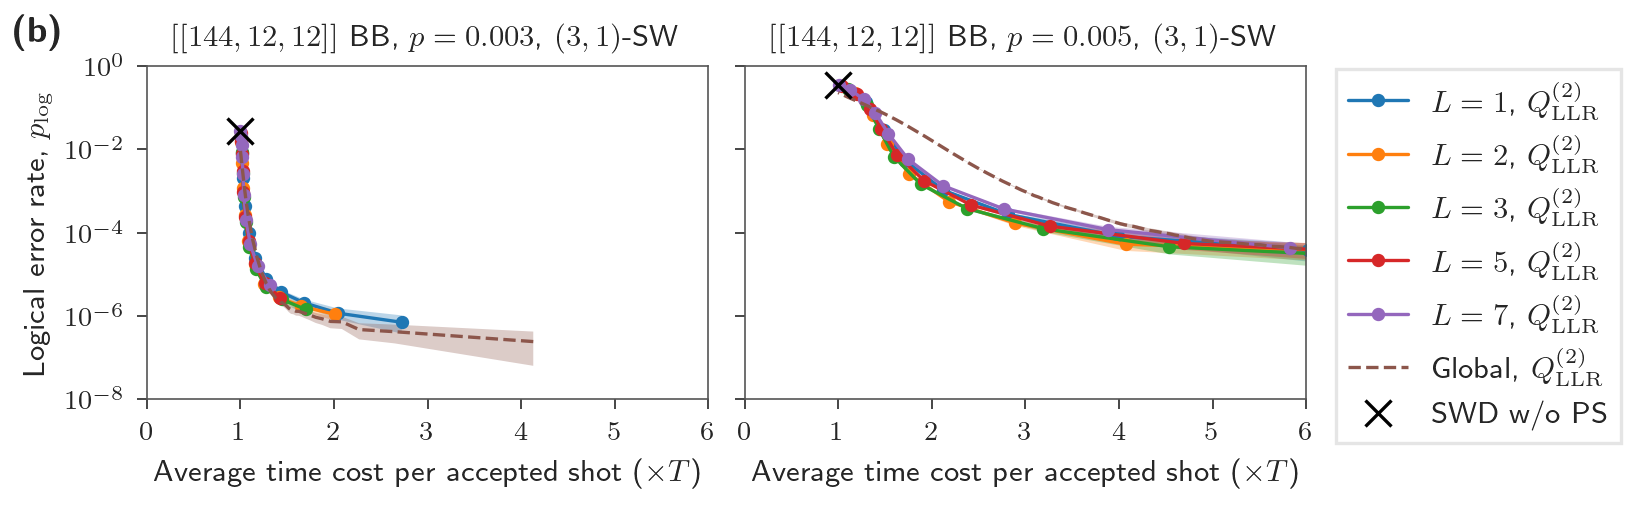

In [6]:
fig = FIG_FORMATTER.figure(wide=True, aspect_ratio=0.3)
axes = fig.subplots(ncols=2, sharey=True)

tol = 1

for i_ax, (prms, dfs_rtps) in enumerate(dfs_rtps_all.items()):
    n, T, p, W, F = prms
    ax = axes[i_ax]
    for config, df in dfs_rtps.items():
        mask = df["delta_p_fail"] / df["p_fail"] < tol
        df_masked = df[mask]

        parts = config.split("_")
        L = int(parts[0][2:])  # Extract number after 'mw'
        order = int(parts[-1])  # Extract last number
        label = rf"$L={L}$, $Q_\mathrm{{LLR}}^{{({order})}}$"

        error_band_plot(
            df_masked["effective_avg_trials"],
            df_masked["p_fail"],
            df_masked["delta_p_fail"],
            ax=ax,
            marker="o",
            label=label if i_ax == 0 else None,
        )

    df_ps_masked = df_ps.loc[(n, T, p)]
    df_ps_masked = df_ps_masked[
        df_ps_masked["delta_p_fail"] / df_ps_masked["p_fail"] < tol
    ]

    error_band_plot(
        1 / (1 - df_ps_masked["p_abort"]),
        df_ps_masked["p_fail"],
        df_ps_masked["delta_p_fail"],
        ax=ax,
        label=r"Global, $Q_\mathrm{LLR}^{(2)}$" if i_ax == 0 else None,
        linestyle="--",
    )

    # Add 'X' mark for ordinary data
    ax.plot(
        1,
        data_ordinary[prms]["p_fail"],
        marker="x",
        markersize=8,
        color="black",
        label="SWD w/o PS" if i_ax == 0 else None,
        linestyle="none",
        zorder=10,
    )

    ax.set_yscale("log")

    ax.set_title(rf"$[[144, 12, 12]]$ BB, $p = {p}$, $({W}, {F})$-SW", fontsize=9)
    ax.set_xlabel(r"Average time cost per accepted shot ($\times T$)")
    if i_ax == 0:
        ax.set_ylabel(r"Logical error rate, $p_\mathrm{log}$")

    ax.set_xticks(np.arange(0, 17))
    ax.set_xlim(0, 6)
    ax.set_ylim(1e-8, 1)

fig.legend(loc="outside right")

fig.text(
    0,
    1,
    r"\textbf{(b)}",
    fontsize=11,
    in_layout=False,
    transform=fig.transFigure,
    verticalalignment="top",
)

fig.savefig("figs/bb_code_sliding_window_analysis.pdf")

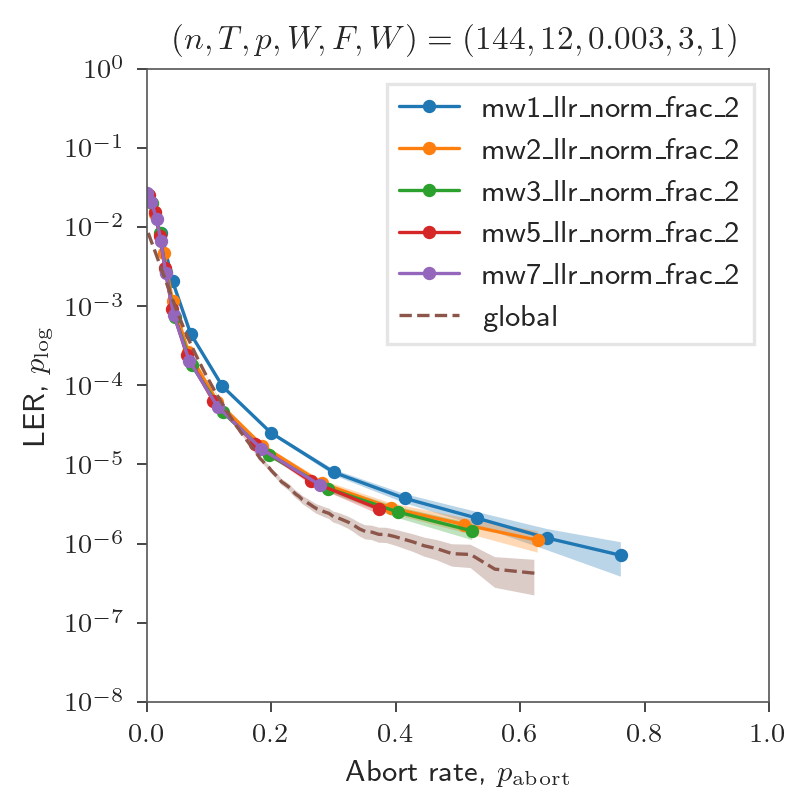

In [36]:
fig = FIG_FORMATTER.figure(aspect_ratio=1)
ax = fig.add_subplot()

tol = 0.7

for config, df in dfs_rtps.items():
    mask = df["delta_p_fail"] / df["p_fail"] < tol
    df_masked = df[mask]

    error_band_plot(
        df_masked["p_abort"],
        df_masked["p_fail"],
        df_masked["delta_p_fail"],
        ax=ax,
        marker="o",
        label=config,
    )

df_ps_masked = df_ps.loc[(n, T, p)]
df_ps_masked = df_ps_masked[df_ps_masked["delta_p_fail"] / df_ps_masked["p_fail"] < tol]

error_band_plot(
    df_ps_masked["p_abort"],
    df_ps_masked["p_fail"],
    df_ps_masked["delta_p_fail"],
    ax=ax,
    label="global",
    linestyle="--",
)

ax.set_yscale("log")

ax.set_title(rf"$(n, T, p, W, F, W) = ({n}, {T}, {p}, {W}, {F})$", fontsize=10)
ax.set_xlabel(r"Abort rate, $p_\mathrm{abort}$")
ax.set_ylabel(r"LER, $p_\mathrm{log}$")

ax.set_xlim(0, 1)
ax.set_ylim(1e-8, 1)

ax.legend()

(0.001, 0.1)

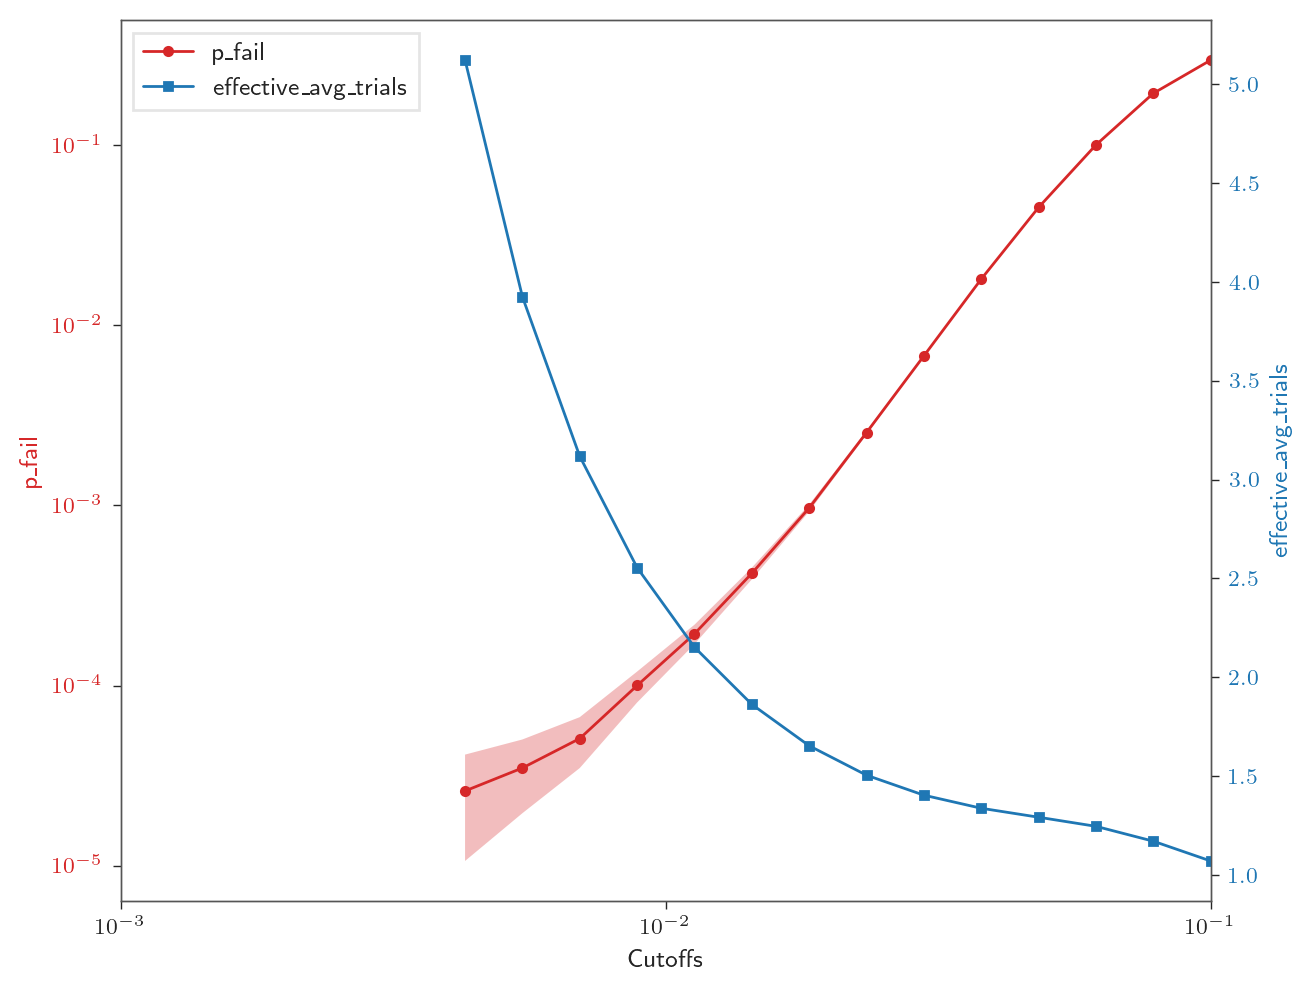

In [ ]:
fig, ax1 = plt.subplots()

mask = dfs_rtps["delta_p_fail"] / dfs_rtps["p_fail"] < 0.7
cutoffs = dfs_rtps["cutoffs"][mask]
p_fail = dfs_rtps["p_fail"][mask]
delta_p_fail = dfs_rtps["delta_p_fail"][mask]
effective_avg_trials = dfs_rtps["effective_avg_trials"][mask]

# Plot p_fail on left y-axis
color1 = "tab:red"
ax1.set_xlabel("Cutoffs")
ax1.set_ylabel("p_fail", color=color1)
line1 = error_band_plot(
    cutoffs,
    p_fail,
    delta_p_fail,
    color=color1,
    marker="o",
    label="p_fail",
)
ax1.tick_params(axis="y", labelcolor=color1)
ax1.set_xscale("log")
ax1.set_yscale("log")

# Create second y-axis for effective_avg_trials
ax2 = ax1.twinx()
color2 = "tab:blue"
ax2.set_ylabel("effective_avg_trials", color=color2)
line2 = ax2.plot(
    cutoffs,
    effective_avg_trials,
    color=color2,
    marker="s",
    label="effective_avg_trials",
)
ax2.tick_params(axis="y", labelcolor=color2)

# Add legend
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc="best")

ax1.set_xlim(1e-3, 0.1)

## Behaviour against $T$

In [ ]:
from simulations.analysis.data_collectors.data_collection import DATA_DIR

prms_list = [(144, T, 3e-3, 3, 1) for T in range(6, 25, 3)]
all_dfs = []
keys = ["cutoffs", "p_fail", "delta_p_fail", "effective_avg_trials", "p_abort"]

for prms in prms_list:
    n, T, p, W, F = prms
    data_dir = os.path.join(
        DATA_DIR, "real_time_post_selection/bb", f"n{n}_T{T}_p{p}_W{W}_F{F}"
    )
    fnames = sorted(os.listdir(data_dir))

    for fname in fnames:
        config = fname.split(".")[0]
        with open(os.path.join(data_dir, fname), "rb") as f:
            df = pickle.load(f)

        df_data = pd.DataFrame({key: df[key] for key in keys})
        df_data["n"] = n
        df_data["T"] = T
        df_data["p"] = p
        df_data["W"] = W
        df_data["F"] = F
        df_data["config"] = config
        all_dfs.append(df_data)

dfs_rtps_combined = pd.concat(all_dfs, ignore_index=True).set_index(
    ["n", "T", "p", "W", "F", "config", "cutoffs"]
)
dfs_rtps_combined.sort_index(inplace=True)

dfs_rtps_combined.head()

p_fail  delta_p_fail  \
n   T p     W F config              cutoffs                                
144 6 0.003 3 1 mw3_llr_norm_frac_2 0.004000  6.819428e-07  1.855300e-07   
                                    0.005720  1.271936e-06  2.434142e-07   
                                    0.008179  2.593002e-06  3.366607e-07   
                                    0.011696  6.987745e-06  5.397347e-07   
                                    0.016725  2.367677e-05  9.772453e-07   

                                              effective_avg_trials   p_abort  
n   T p     W F config              cutoffs                                   
144 6 0.003 3 1 mw3_llr_norm_frac_2 0.004000              1.201486  0.253299  
                                    0.005720              1.134955  0.182972  
                                    0.008179              1.087266  0.124873  
                                    0.011696              1.054054  0.079931  
                                    0.016725              1.032161  0.048046

In [50]:
def fit_quadratic(
    x_data: np.ndarray,
    y_data: np.ndarray,
    log_scale: bool = False,
) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    Fit quadratic function to data and return fitted parameters and curve.
    """
    x_data = np.asarray(x_data)
    y_data = np.asarray(y_data)

    # Prepare data for fitting
    if log_scale:
        y_fit_data = np.log(y_data)
    else:
        y_fit_data = y_data

    # Fit quadratic function
    coeffs = np.polyfit(x_data, y_fit_data, 2)
    x_fit = np.linspace(x_data.min(), x_data.max(), 100)
    y_fit_raw = np.polyval(coeffs, x_fit)

    # Transform back if log scale
    if log_scale:
        y_fit = np.exp(y_fit_raw)
    else:
        y_fit = y_fit_raw

    return coeffs, x_fit, y_fit

In [51]:
unique_cutoffs = sorted(dfs_rtps_combined.index.get_level_values("cutoffs").unique())
print(unique_cutoffs)

[0.004, 0.00572, 0.008179, 0.011696, 0.016725, 0.023916, 0.0342, 0.048904, 0.069932, 0.1]


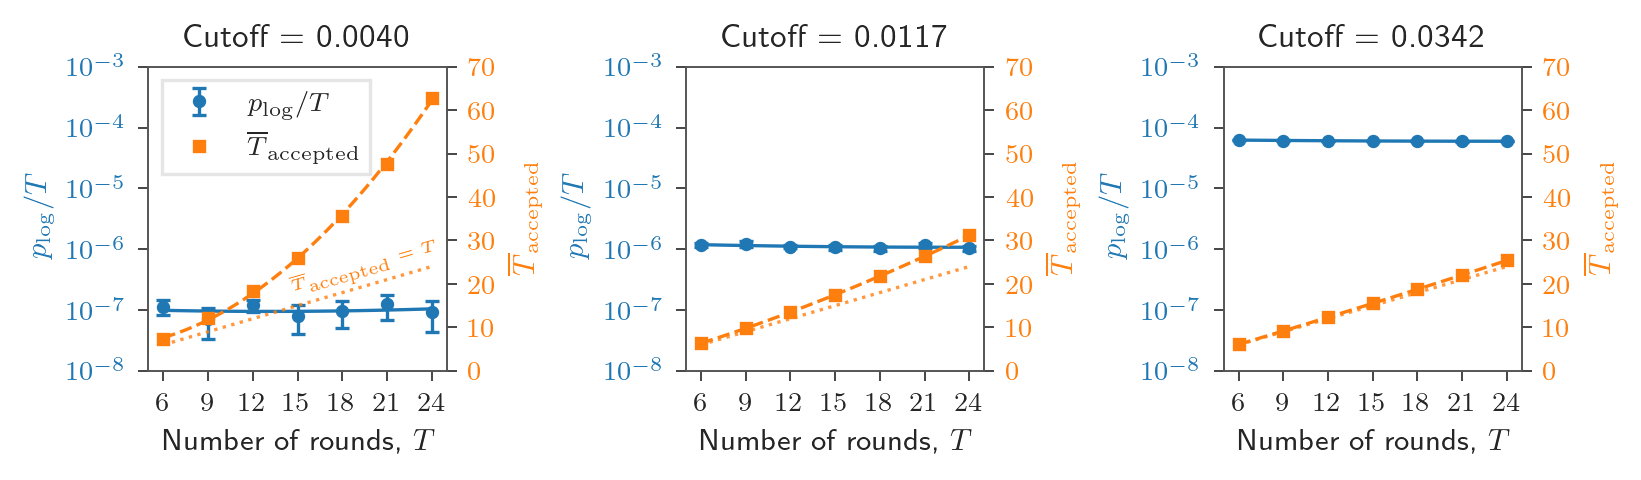

In [83]:
fig = FIG_FORMATTER.figure(wide=True, aspect_ratio=0.28)
axes = fig.subplots(ncols=3)

# Fixed parameters
n_fixed, p_fixed, W_fixed, F_fixed, config_fixed = (
    144,
    0.003,
    3,
    1,
    "mw3_llr_norm_frac_2",
)

cutoff_values = [0.004, 0.011696, 0.0342]

colors = [COLORS(0), COLORS(1)]

plot_plog_per_round = True
plot_avg_trials_per_round = False

for i_ax, cutoff_value in enumerate(cutoff_values):
    ax1 = axes[i_ax]
    ax2 = ax1.twinx()

    # Filter data for fixed parameters and current cutoff
    data_subset = dfs_rtps_combined.loc[
        (n_fixed, slice(None), p_fixed, W_fixed, F_fixed, config_fixed, cutoff_value)
    ]

    # Get T values and data
    T_values = data_subset.index.get_level_values("T")

    # Prepare p_fail data (either per round or total)
    if plot_plog_per_round:
        p_fail_data = data_subset["p_fail"] / T_values
        delta_p_fail_data = data_subset["delta_p_fail"] / T_values
        y_label = r"$p_\mathrm{log}/T$"
        legend_label = r"$p_\mathrm{log}/T$"
    else:
        p_fail_data = data_subset["p_fail"]
        delta_p_fail_data = data_subset["delta_p_fail"]
        y_label = r"Logical error rate, $p_\mathrm{log}$"
        legend_label = r"$p_\mathrm{log}$"

    # Fit p_fail data (in log space)
    coeffs1, x_fit1, y_fit1 = fit_quadratic(
        x_data=T_values,
        y_data=p_fail_data,
        log_scale=True,
    )

    # Plot p_fail data points and fitted curve
    ax1.errorbar(
        T_values,
        p_fail_data,
        yerr=delta_p_fail_data,
        color=colors[0],
        marker="o",
        linestyle="none",
        capsize=2,
        label=legend_label,
    )
    ax1.plot(
        x_fit1,
        y_fit1,
        color=colors[0],
        linestyle="-",
    )
    ax1.set_ylabel(y_label, color=colors[0])
    ax1.tick_params(axis="y", labelcolor=colors[0])
    ax1.set_yscale("log")

    # Prepare effective_avg_trials data (either per round or total)
    if plot_avg_trials_per_round:
        avg_trials_data = data_subset["effective_avg_trials"]
        y2_label = r"$\overline{T}_\mathrm{accepted}/T$"
        legend_label2 = r"$\overline{T}_\mathrm{accepted}/T$"
    else:
        avg_trials_data = data_subset["effective_avg_trials"] * T_values
        y2_label = r"$\overline{T}_\mathrm{accepted}$"
        legend_label2 = r"$\overline{T}_\mathrm{accepted}$"

    # Fit effective_avg_trials data
    coeffs2, x_fit2, y_fit2 = fit_quadratic(
        x_data=T_values,
        y_data=avg_trials_data,
        log_scale=False,
    )

    # Plot effective_avg_trials data points and fitted curve
    ax2.plot(
        T_values,
        avg_trials_data,
        marker="s",
        color=colors[1],
        linestyle="none",
        label=legend_label2,
    )
    ax2.plot(
        x_fit2,
        y_fit2,
        color=colors[1],
        linestyle="--",
    )

    # Add reference line
    if plot_avg_trials_per_round:
        # Add y=1 line for per-round plotting
        ax2.axhline(y=1, color=COLORS(1), linestyle=":", alpha=0.7)
    else:
        # Add y=x line for total plotting
        ax2.plot(
            T_values,
            T_values,
            color=COLORS(1),
            linestyle=":",
            alpha=0.8,
        )

        if i_ax == 0:
            ax2.text(
                0.47,
                0.26,
                r"$\overline{T}_\mathrm{accepted} = T$",
                transform=ax2.transAxes,
                fontsize=5,
                color=COLORS(1),
                rotation=16,
            )

    ax2.set_ylabel(y2_label, color=colors[1])
    ax2.tick_params(axis="y", labelcolor=colors[1])

    ax1.set_xlabel("Number of rounds, $T$")
    ax1.set_title(f"Cutoff = {cutoff_value:.4f}", fontsize=10)

    ax1.set_xlim(5, 25)
    ax1.set_xticks(range(6, 25, 3))
    if plot_plog_per_round:
        ax1.set_ylim(1e-8, 1e-3)
        ax1.set_yticks(10.0 ** np.arange(-8, -2))
    else:
        ax1.set_ylim(1e-7, 1e-2)
        ax1.set_yticks(10.0 ** np.arange(-7, -1))

    if plot_avg_trials_per_round:
        ax2.set_ylim(1, 3)
        ax2.set_yticks(np.arange(1, 3.1, 0.5))
    else:
        ax2.set_ylim(0, 70)
        ax2.set_yticks(range(0, 71, 10))

    # Add combined legend to the first subplot only
    if i_ax == 0:
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left", fontsize=8)